# Import useful libraries:-

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import scipy



# Import dataset after converting it into a csv file:-

In [5]:
data=pd.read_csv(r'C:\Users\Home\Desktop\Baby_Destination\Data Science Data-Modelling.csv')

In [6]:
data.head(6)

,text,ground_truth_labels
0,my 14 month old baby raat me bhook ki wajah we...,Que
1,hi my baby is going to be 2 yrs nw but he is 2...,Que
2,meri beti 1 5 year ki hai uska waight nahi ...,Que
3,please mummies help me mei apni 8 months ki ...,Que
4,hi moms can i give dry fruit mix powder to my...,Que
5,hello freinds mi baby boy is 7month old an...,Que


In [7]:
data.shape

(2118, 2)

# Split main dataset into train and test dataset:-

In [96]:
train_data=data.iloc[:1799,:]
test_data=data.iloc[1799:,:].reset_index().drop(columns=['index'],axis=1)

In [9]:
data['ground_truth_labels'].unique()

array(['Que', 'NotQue', nan], dtype=object)

# Find out length of text's having label 'Que' and 'NotQue' respectively as it might be a good feature to calssify our text:-

In [10]:
length_text_notq=[]
for i in train_data['text'][train_data['ground_truth_labels']=='NotQue'].tolist():
    length_text_notq.append(len(i))
    

In [11]:
pd.DataFrame(np.array(length_text_notq)).describe()

,0
count,1166.000000
mean,79.549743
std,87.632821
min,6.000000
25%,30.250000
50%,53.000000
75%,94.000000
max,1147.000000


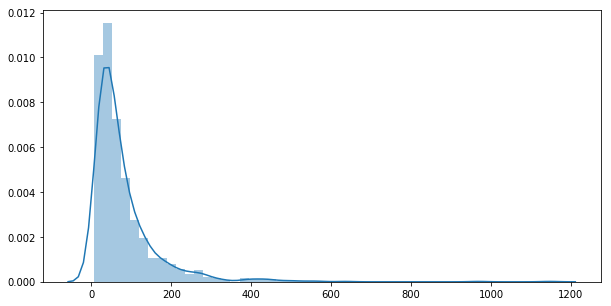

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(np.array(length_text_notq))

In [13]:
length_text_q=[]
for i in train_data['text'][train_data['ground_truth_labels']=='Que'].tolist():
    length_text_q.append(len(i))

In [14]:
pd.DataFrame(np.array(length_text_q)).describe()

,0
count,633.000000
mean,162.519747
std,125.253667
min,1.000000
25%,78.000000
50%,126.000000
75%,204.000000
max,896.000000


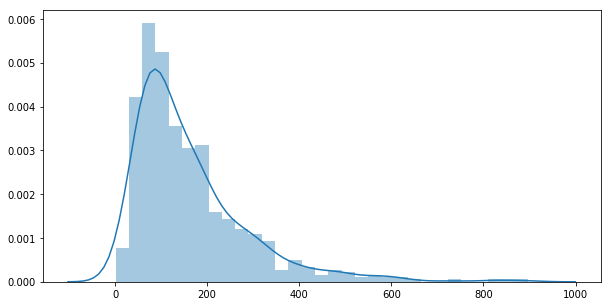

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(np.array(length_text_q))

#### We can clearly see that the sentences length's have diiferent distribution when compared to each other, having labels 'Que' and 'NotQue': 
#### It would definitely be a good feature for sentence classification and we will check this when we apply ML algorithm: 

# Create two new datasets having labels 'Que' and 'NotQue' respectively to visulaize some important features:-

In [16]:
A=train_data['text'][train_data['ground_truth_labels']=='Que'].reset_index().drop(columns=['index'],axis=1)
B=train_data['text'][train_data['ground_truth_labels']=='NotQue'].reset_index().drop(columns=['index'],axis=1)


In [17]:
A.shape
B.shape

(1166, 1)

## Que's length can't be too small & to check that we can use below code:-

In [18]:
small_que=[]
for i in train_data['text'][train_data['ground_truth_labels']=='Que'].tolist():
    if len(i)<20:
        small_que.append(i)
        

In [19]:
small_que

['no', 'helli', 'hello mom', 'h', 'formula milk']

## As we can see that this text is not representing que so we need to change their label from 'Que' to 'NotQue':- 

In [20]:
new_label=[]
for i in range(0,1799):
    if data['text'][i] not in small_que:
        new_label.append(data['ground_truth_labels'][i])
    else:
        new_label.append('NotQue')    

New dataset is created after replacing wrong mentioned entries in label column:-

In [21]:
new_data=pd.concat([data,pd.DataFrame(np.array(new_label),columns=['new_label'])],axis=1).drop(columns=['ground_truth_labels'],axis=1)

## Again create two new datasets having labels 'Que' and 'NotQue' respectively(after changing few lables) to visulaize some important features:-

In [22]:
A_new=new_data['text'][new_data['new_label']=='Que'].reset_index().drop(columns=['index'],axis=1)
B_new=new_data['text'][new_data['new_label']=='NotQue'].reset_index().drop(columns=['index'],axis=1)

In [23]:
print(A_new.shape)
print(B_new.shape)

(628, 1)
(1171, 1)


# Visualization of words of text's having labels 'Que' and 'NotQue' respectively:-

### for labels having 'Que':-

Text preprocessing and visualization:-

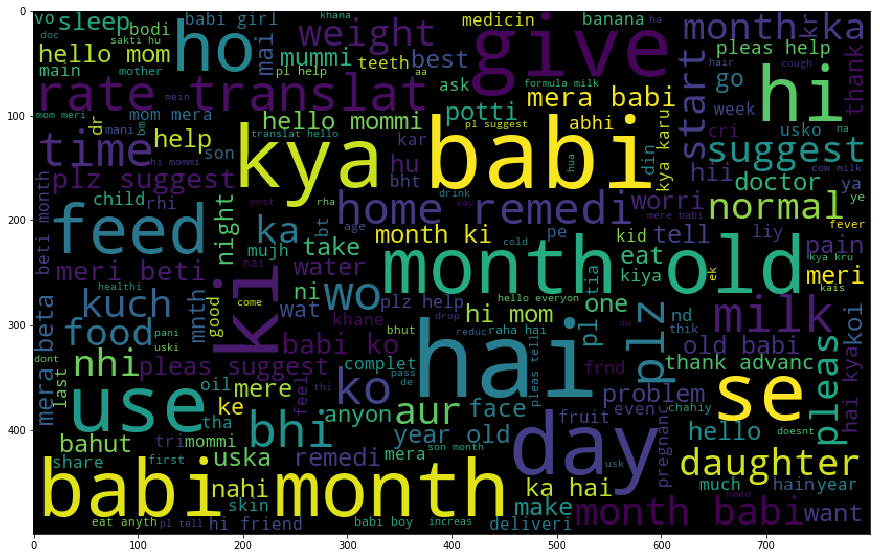

In [24]:
text_q=[]

for i in range(0,628):
    Re=re.sub('[^a-zA-Z0-9]',' ',A_new['text'][i])
    Re=Re.lower()
    Re=Re.split()
    Re=[ps.stem(word) for word in Re if not word in set(stopwords.words('english'))]
    Re=' '.join(Re)
    text_q.append(Re)
    
all_words_q=' '.join(text_q)

#visualization on wordcloud:

wc=WordCloud(width=800,height=500,random_state=21,max_font_size=100,min_font_size=3).generate(all_words_q)
plt.figure(figsize=(15,10))
plt.imshow(wc)

### for labels having 'NotQue':-

Text preprocessing and visualization:-

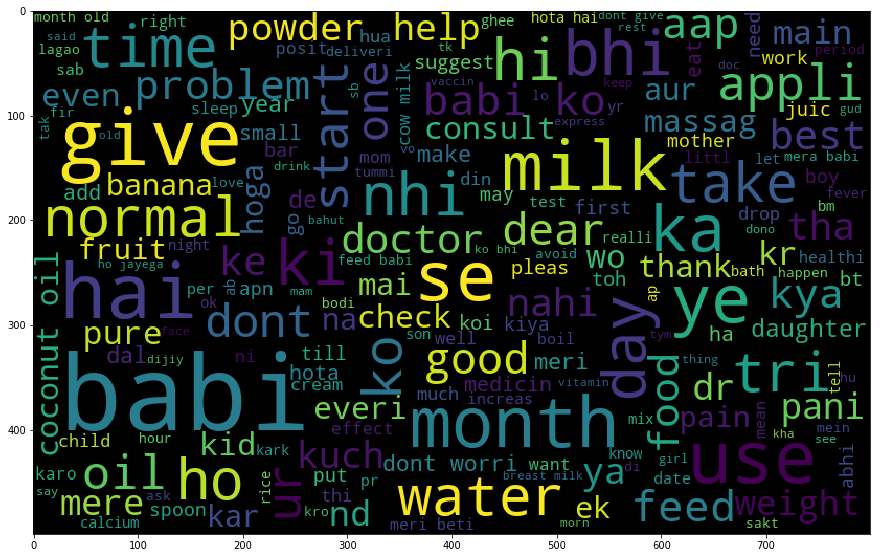

In [25]:
text_notq=[]

for i in range(0,1171):
    Re=re.sub('[^a-zA-Z0-9]',' ',B_new['text'][i])
    Re=Re.lower()
    Re=Re.split()
    Re=[ps.stem(word) for word in Re if not word in set(stopwords.words('english'))]
    Re=' '.join(Re)
    text_notq.append(Re)
    
all_words_notq=' '.join(text_notq)

#visualization on wordcloud:

wc=WordCloud(width=800,height=500,random_state=21,max_font_size=100,min_font_size=3).generate(all_words_notq)
plt.figure(figsize=(15,10))
plt.imshow(wc)

### As we can see that there are some commen words in both the wordcloud, we can remove these words to from our corpus: 

# Freq-distribution of words of sentences having label 'NotQue':

In [30]:
a=nltk.FreqDist(all_words_notq.split())
F=pd.DataFrame({'words': list(a.keys()),'count':list(a.values())})
F=F.nlargest(columns='count',n=50)
F.head(10)

,count,words
2621,296,babi
1113,151,h
432,128,hai
255,122,milk
2445,122,give
557,103,ko
3263,103,month
819,97,use
2396,92,n
252,91,u


# Freq-distribution of words of sentences having label 'Que':

In [31]:
b=nltk.FreqDist(all_words_q.split())
E=pd.DataFrame({'words': list(b.keys()),'count':list(b.values())})
E=E.nlargest(columns='count',n=50)
E.head(10)


,count,words
2255,408,babi
2221,324,month
536,250,hai
962,212,h
919,154,hi
599,150,old
2669,144,kya
2758,138,suggest
150,133,hello
1839,120,ki


### We need to find out commen words of sentences having label 'Que' and 'NotQue' and we should remove those words from our corpus as they are not useful to classify text's between lables 'Que' and 'NotQue':-

In [32]:
l=list(set(F['words'].tolist()).intersection(set(E['words'].tolist())))

In [33]:
l_set=set(l)
l_set

{'2',
 '3',
 '5',
 'babi',
 'bhi',
 'day',
 'feed',
 'food',
 'give',
 'h',
 'hai',
 'hi',
 'ho',
 'k',
 'ka',
 'ki',
 'ko',
 'kya',
 'meri',
 'milk',
 'month',
 'n',
 'normal',
 'se',
 'time',
 'use'}

In [34]:
l.remove('kya')

# Text preprocessing on overall dataset to apply Machine Learning algorithms and classify sentences:

In [35]:
text=[]

for i in range(0,2118):
    Re=re.sub('[^a-zA-Z0-9]',' ',new_data['text'][i])
    Re=Re.lower()
    Re=Re.split()
    Re=[ps.stem(word) for word in Re if not word in set(stopwords.words('english'))]
    Re=' '.join(Re)
    text.append(Re)

In [36]:
len(text)

2118

Removed some commen words of sentences having label 'Que' and 'NotQue' respectively:

In [37]:
not_remove_text=[]
for i in range(0,2118):
    not_remove=[word for word in set(text[i].split()) if not word in l_set]
    not_remove=' '.join(not_remove)
    not_remove_text.append(not_remove)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

# Bag of words model to convert words into vector form & applied ML algorithm for classification:-

## Apply random forest model on training dataset: 

In [60]:
cv=CountVectorizer()
dcm=cv.fit_transform(not_remove_text)

train=dcm[:1799,:]


x_train,x_test,y_train,y_test=train_test_split(train,new_data['new_label'][:1799].map({'Que':1,'NotQue':0}),random_state=21,test_size=.20)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)

print(f1_score(y_test,y_pred))
print(cm)

0.7804878048780487
[[235  17]
 [ 28  80]]


## If we add our 'length of each sentences' to training dataset:- 

In [43]:
l=[]
for i in new_data['text'][:1799].tolist():
    l.append(len(i))

In [44]:
new_dcm=scipy.sparse.hstack((dcm[:1799,:],np.array(l).reshape(1799,1)))

In [59]:
cv=CountVectorizer()

x1_train,x1_test,y1_train,y1_test=train_test_split(new_dcm,new_data['new_label'][:1799].map({'Que':1,'NotQue':0}),random_state=21,test_size=.20)

rfc.fit(x1_train,y1_train)
y1_pred=rfc.predict(x1_test)

cm=confusion_matrix(y1_test,y1_pred)

print(f1_score(y1_test,y1_pred))
print(cm)

0.8195121951219513
[[239  13]
 [ 24  84]]


### we can see that our model's accuracy has improved significantlly when we added sentence's length feature into our training dataset: 

# XGBoost classifier:-

In [64]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [68]:
cv=CountVectorizer()

x1_train,x1_test,y1_train,y1_test=train_test_split(new_dcm,new_data['new_label'][:1799].map({'Que':1,'NotQue':0}),random_state=21,test_size=.20)

xgb.fit(x1_train,y1_train)
y1_pred=xgb.predict(x1_test)

cm=confusion_matrix(y1_test,y1_pred)

print(f1_score(y1_test,y1_pred))
print(cm)

0.8121827411167513
[[243   9]
 [ 28  80]]


### As we can see that both random forest and xgb classifeir are giving almost a same result so we will take xgb classifier to predict labels of test dataset:- 

In [79]:
l1=[]
for i in new_data['text'][1799:].tolist():
    l1.append(len(i))

In [81]:
test_dcm=scipy.sparse.hstack((dcm[1799:,:],np.array(l1).reshape(319,1)))

In [83]:
cv=CountVectorizer()

xgb.fit(new_dcm,new_data['new_label'][:1799].map({'Que':1,'NotQue':0}))
y_pred=xgb.predict(test_dcm)


In [100]:
Final_Result=pd.concat([test_data,pd.DataFrame(y_pred,columns=['pred_label'])],axis=1).drop(columns=['ground_truth_labels'])

#### make a csv file of final result: 

In [103]:
Final_Result.to_csv(r'C:\Users\Home\Desktop\Baby_Destination\submission\final_result.csv',index=False)